<a href="https://colab.research.google.com/github/DebjitHore/PadhAI_FDS/blob/master/PadhAI_Week13_OpenEndedDSProblems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handle Missing Data

## NumPy

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
x= np.array([1,2,3,4,5])

In [50]:
x.sum()

15

In [51]:
x.dtype

dtype('int64')

In [52]:
x= np.array([1,2,3,'--',5])
x.sum() #cannot perform reduce with flexible type

TypeError: ignored

In [55]:
x= np.array([1,2,3,None,5])
x.sum()

TypeError: ignored

In [56]:
x= np.array([1,2,3,np.nan,5])
x.sum() #Not a number is returned

nan

In [57]:
x_b= np.array([True, True, True, False, True])

In [53]:
x[x_b]

array(['1', '2', '3', '5'], dtype='<U21')

In [58]:
x[x_b].mean()

2.75

In [59]:
mask_x= np.ma.masked_array(x, mask=[0,0,0,1,0])
mask_x #The index marked as mask positive is suppressed   

masked_array(data=[1.0, 2.0, 3.0, --, 5.0],
             mask=[False, False, False,  True, False],
       fill_value=1e+20)

In [60]:
mask_x.sum()

11.0

##Pandas

In [61]:
r= pd.read_csv('rooms.csv')
r.head()

,Room_Number,Num_Students,Department,Occupied
0,101.0,1,Mechanical,Y
1,102.0,NaN,Empty,N
2,103.0,3,Electrical,Y
3,104.0,2,Mechanical,Y
4,105.0,NaN,Chemical,N


In [62]:
r.dtypes

Room_Number     float64
Num_Students     object
Department       object
Occupied         object
dtype: object

In [63]:
r.Room_Number.isnull()
#r.Room_Number.isna()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Room_Number, dtype: bool

In [64]:
r.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,True
9,False,False,False,False


In [65]:
r.isnull().sum() #Sum of number of null values in each column is returned as a series

Room_Number     1
Num_Students    3
Department      0
Occupied        1
dtype: int64

In [66]:
missing_values= ['NA', 'na', 'n/a', 'Empty', '--']
df= pd.read_csv('rooms.csv', na_values=missing_values)

In [67]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,NaN,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,NaN
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,NaN
9,110.0,2.0,CS,N


In [68]:
df.Department.isnull().sum()


1

In [69]:
df.Occupied.fillna("N", inplace=True)
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,NaN,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,N
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,N
9,110.0,2.0,CS,N


In [70]:
df.Department.fillna(method='ffill', inplace=True)
df #fills up the Department value with previous in case if NAN

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,Mechanical,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,N
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,N
9,110.0,2.0,CS,N


In [71]:
df.Num_Students.fillna(df.Num_Students.median(), inplace=True)
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,2.0,Mechanical,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,2.0,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,N
7,108.0,2.0,CS,Y
8,109.0,2.0,Mechanical,N
9,110.0,2.0,CS,N


In [72]:
df.Room_Number.interpolate(inplace=True)
df
#df.Room_Number.interpolate(method='quadritic', inplace=True)

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,2.0,Mechanical,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,2.0,Chemical,N
5,106.0,1.0,Electrical,Y
6,107.0,3.0,Civil,N
7,108.0,2.0,CS,Y
8,109.0,2.0,Mechanical,N
9,110.0,2.0,CS,N


# Open Ended Descriptive Statistics.


In [75]:
df= pd.read_excel('train.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [79]:
df.shape

(3998, 39)

In [80]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [81]:
df.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [83]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

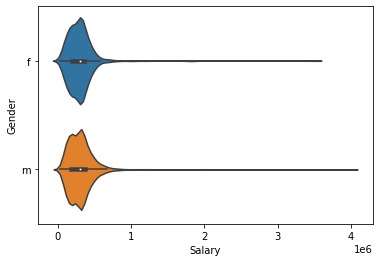

In [86]:
sns.violinplot(x='Salary', y='Gender', data=df)

In [88]:
df[['10percentage', '12percentage', 'collegeGPA', 'Salary', 'Gender']].groupby("Gender").mean()

,10percentage,12percentage,collegeGPA,Salary
Gender,,,,
f,80.932894,77.007618,74.048056,294937.304075
m,76.979000,73.666636,70.679947,311716.211772


In [90]:
df[['10percentage', '12percentage', 'collegeGPA', 'Salary', 'Gender']].groupby("Gender").median()

,10percentage,12percentage,collegeGPA,Salary
Gender,,,,
f,82.4,77.0,74.00,300000
m,78.0,73.4,70.66,300000


In [93]:
th= df.Salary.mean()+ df.Salary.std()
th

520437.3498818199

In [94]:
df['HighIncome']= df.Salary>th
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High Income,HighIncome
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,False,False
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,False,False
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,False,False
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,True,True
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,False,False
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,False,False
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,False,False
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,False,False


In [98]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,HighIncome
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,False
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,False
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,False
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,True
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,False


In [104]:

df[['Salary', 'HighIncome', 'Gender']].groupby([ 'HighIncome', 'Gender']).mean()

Salary
HighIncome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

In [105]:
df[['Salary', 'HighIncome', 'Gender']].groupby([ 'HighIncome', 'Gender']).count()

Salary
HighIncome Gender        
False      f          917
           m         2809
True       f           40
           m          232

In [106]:
df.CollegeTier.unique()

array([2, 1])

In [108]:
df[['CollegeTier', 'HighIncome', 'Salary']].groupby(['HighIncome', 'CollegeTier']).count()

Salary
HighIncome CollegeTier        
False      1               234
           2              3492
True       1                63
           2               209

# Agricultural Example_Part_1

In [117]:
ag= pd.read_csv('apy.csv', na_values=['='])
ag.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [110]:
ag.info

<bound method DataFrame.info of                          State_Name District_Name  ...    Area Production
0       Andaman and Nicobar Islands      NICOBARS  ...  1254.0       2000
1       Andaman and Nicobar Islands      NICOBARS  ...     2.0          1
2       Andaman and Nicobar Islands      NICOBARS  ...   102.0        321
3       Andaman and Nicobar Islands      NICOBARS  ...   176.0        641
4       Andaman and Nicobar Islands      NICOBARS  ...   720.0        165
...                             ...           ...  ...     ...        ...
113369               Madhya Pradesh       KHANDWA  ...    35.0        114
113370               Madhya Pradesh       KHANDWA  ...  5110.0     156764
113371               Madhya Pradesh       KHANDWA  ...   406.0       5603
113372               Madhya Pradesh       KHANDWA  ...  3033.0       1140
113373               Madhya Pradesh       KHANDWA  ...     NaN        NaN

[113374 rows x 7 columns]>

In [119]:
ag.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [120]:
ag.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3727
dtype: int64

In [116]:
ag.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [118]:
ag['Production']= pd.to_numeric(ag['Production'])

In [126]:
ag.dropna(inplace=True)

In [127]:
ag.groupby(['State_Name', 'Crop', 'Crop_Year']).sum()

Area  Production
State_Name                  Crop     Crop_Year                       
Andaman and Nicobar Islands Arecanut 2000         4354.00     7200.00
                                     2001         4354.00     7300.00
                                     2002         4363.00     7350.00
                                     2003         4379.00     6707.00
                                     2004         4425.37     4781.05
...                                                   ...         ...
West Bengal                 Wheat    2010       316808.00   874415.00
                                     2011       315659.00   872895.00
                                     2012       321572.00   895927.00
                                     2013       331481.00   927837.00
                                     2014       334640.00   939254.00

[12896 rows x 2 columns]

In [128]:
ag.groupby(['State_Name', 'Crop_Year']).sum()

Area   Production
State_Name                  Crop_Year                         
Andaman and Nicobar Islands 2000         44518.00  89060914.00
                            2001         41163.00  89718700.00
                            2002         45231.40  94387137.67
                            2003         44799.40  95296454.67
                            2004         45308.77  87186497.63
...                                           ...          ...
West Bengal                 2010       7246875.00  38308645.00
                            2011       7755360.00  36777774.00
                            2012       7850936.00  38918275.00
                            2013       7999815.00  37901281.00
                            2014       8058390.00  43584403.00

[519 rows x 2 columns]

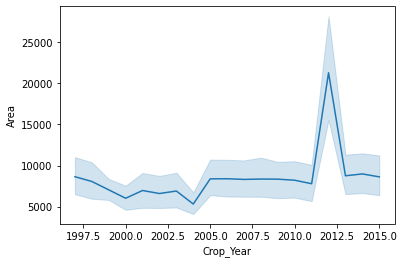

In [131]:
sns.lineplot(x= 'Crop_Year', y='Area', data= ag[ag.State_Name == 'Odisha']);

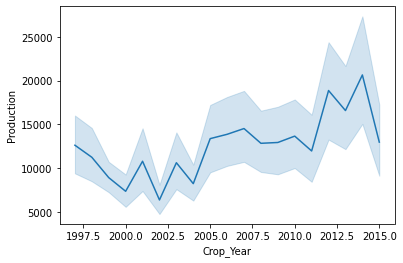

In [132]:
sns.lineplot(x= 'Crop_Year', y='Production', data= ag[ag.State_Name == 'Odisha']);

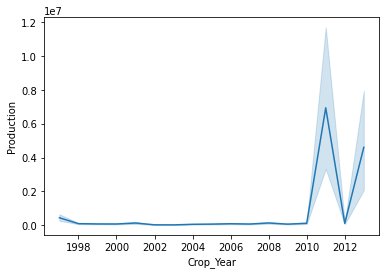

In [133]:
sns.lineplot(x= 'Crop_Year', y='Production', data= ag[ag.State_Name == 'Tamil Nadu']);

In [135]:
!pip3 install plotly_express;

In [138]:
import plotly_express as px

In [143]:
ag_ = ag.groupby(['State_Name', 'Crop_Year']).sum()


In [148]:
ag_.reset_index(inplace=True)
ag_.sort_values('Crop_Year', inplace=True)

In [149]:
px.scatter(ag_, x='Area', y='Production', animation_frame='Crop_Year', animation_group='State_Name', color='State_Name')

In [153]:
ag_2= ag[ag['Crop'].isin(['Rice', 'Wheat', 'Maize', 'Ragi'])].groupby(['State_Name', 'Crop_Year']).sum()
ag_2.reset_index(inplace=True)
ag_2

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,10881.00,32184.00
1,Andaman and Nicobar Islands,2001,9801.00,27333.00
2,Andaman and Nicobar Islands,2002,10885.00,32111.66
3,Andaman and Nicobar Islands,2003,10561.37,30850.87
4,Andaman and Nicobar Islands,2004,10734.92,29192.23
...,...,...,...,...
513,West Bengal,2010,5361309.00,14630175.00
514,West Bengal,2011,5855620.00,15851031.00
515,West Bengal,2012,5898997.00,16315137.00
516,West Bengal,2013,5999179.00,16936255.00


In [155]:
px.scatter(ag_2, x='Area', y='Production', animation_frame='Crop_Year', animation_group='State_Name', color='State_Name')

In [156]:
ag_2['Efficiency'] = ag_2['Production']/ag_2['Area']

In [160]:
px.scatter(ag_2, x='Area', y='Efficiency', size='Production', animation_frame='Crop_Year', animation_group='State_Name', range_y=[0.75,5], range_x=[-1e6, 20e6], color='State_Name')